# Bu projede, Konya ilindeki konutların fiyatları ve çeşitli özellikleri web üzerinden toplanarak, bu verilere dayalı olarak konut fiyatlarını tahmin eden bir makine öğrenmesi modeli geliştirildi.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
df=pd.read_csv("konya_satilik_konutlar.csv")

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,İlan Tarihi,İlan no,Net m²,Brüt m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Isıtma Tipi,Konut Şekli,Bulunduğu Kat,Bina Yaşı,Kullanım Durumu,Yapının Durumu,Kira Getirisi,Kimden,Krediye Uygun,Location,Price,Görüntülü Ev Gezintisi\n?,Hayvan Dostu Patili Evler,Mobilya Durumu,Takasa Uygun,Aidat,Tapu Durumu,Ada,Parsel,Yapı Tipi
0,30 Eylül 2024,5145472,115,128m²,3+1,1.0,3,Kombi (Doğalgaz),Ara Kat,2,26-30 arası,Mülk Sahibi,İkinci El,10.000 TL (aylık),Danışman,Evet,"Yeni, Akşehir\n, Konya",1.860.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21 Eylül 2024,5115610,130,141m²,2+1,1.0,5,Kombi (Doğalgaz),NaN,3,21-25 arası,Kiracılı,NaN,9.000 TL (aylık),NaN,Hayır,"İstasyon, Akşehir\n, Konya",1.675.000 TL,?,Evet,Eşyasız,NaN,NaN,NaN,NaN,NaN,NaN
2,26 Eylül 2024,5142613,155,180m²,4+1,2.0,5,NaN,Ara Kat,2,0,Boş,Sıfır,18.000 TL (aylık),Danışman,Evet,"Gazi, Akşehir\n, Konya",3.500.000 TL,NaN,NaN,Eşyasız,Evet,0 TL (aylık),NaN,NaN,NaN,NaN
3,20 Eylül 2024,5055209,130,145m²,2+1,1.0,NaN,Kalorifer (Doğalgaz),Bahçe Dubleksi,1,NaN,NaN,NaN,NaN,NaN,Hayır,"Kileci, Akşehir\n, Konya",1.625.000.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 Eylül 2024,5137354,145,165m²,3+1,1.0,5,Kombi (Doğalgaz),Ara Kat,4,6-10 arası,Boş,İkinci El,17.000 TL (aylık),Danışman,Evet,"Yeni, Akşehir\n, Konya",3.550.000 TL,NaN,NaN,Eşyasız,NaN,0 TL (aylık),NaN,NaN,NaN,NaN


In [4]:
df.shape

(295, 27)

In [5]:
df.columns

Index(['İlan Tarihi', 'İlan no', 'Net m²', 'Brüt m²', 'Oda Sayısı',
       'Banyo Sayısı', 'Binadaki Kat Sayısı', 'Isıtma Tipi', 'Konut Şekli',
       'Bulunduğu Kat', 'Bina Yaşı', 'Kullanım Durumu', 'Yapının Durumu',
       'Kira Getirisi', 'Kimden', 'Krediye Uygun', 'Location', 'Price',
       'Görüntülü Ev Gezintisi\n?', 'Hayvan Dostu Patili Evler',
       'Mobilya Durumu', 'Takasa Uygun', 'Aidat', 'Tapu Durumu', 'Ada',
       'Parsel', 'Yapı Tipi'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   İlan Tarihi                295 non-null    object 
 1   İlan no                    295 non-null    int64  
 2   Net m²                     295 non-null    int64  
 3   Brüt m²                    295 non-null    object 
 4   Oda Sayısı                 290 non-null    object 
 5   Banyo Sayısı               290 non-null    float64
 6   Binadaki Kat Sayısı        257 non-null    object 
 7   Isıtma Tipi                227 non-null    object 
 8   Konut Şekli                138 non-null    object 
 9   Bulunduğu Kat              238 non-null    object 
 10  Bina Yaşı                  217 non-null    object 
 11  Kullanım Durumu            214 non-null    object 
 12  Yapının Durumu             131 non-null    object 
 13  Kira Getirisi              139 non-null    object 

In [7]:
df.isnull().sum()

İlan Tarihi                    0
İlan no                        0
Net m²                         0
Brüt m²                        0
Oda Sayısı                     5
Banyo Sayısı                   5
Binadaki Kat Sayısı           38
Isıtma Tipi                   68
Konut Şekli                  157
Bulunduğu Kat                 57
Bina Yaşı                     78
Kullanım Durumu               81
Yapının Durumu               164
Kira Getirisi                156
Kimden                       189
Krediye Uygun                  0
Location                       0
Price                          0
Görüntülü Ev Gezintisi\n?    263
Hayvan Dostu Patili Evler    285
Mobilya Durumu               205
Takasa Uygun                 216
Aidat                        211
Tapu Durumu                  250
Ada                          292
Parsel                       292
Yapı Tipi                    293
dtype: int64

In [8]:
df.tail()

,İlan Tarihi,İlan no,Net m²,Brüt m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Isıtma Tipi,Konut Şekli,Bulunduğu Kat,Bina Yaşı,Kullanım Durumu,Yapının Durumu,Kira Getirisi,Kimden,Krediye Uygun,Location,Price,Görüntülü Ev Gezintisi\n?,Hayvan Dostu Patili Evler,Mobilya Durumu,Takasa Uygun,Aidat,Tapu Durumu,Ada,Parsel,Yapı Tipi
290,25 Ağustos 2024,4554764,110,160m²,3+1,1.0,3,Kombi (Doğalgaz),Giriş Kat,2,0,Boş,Sıfır,25.000 TL (aylık),NaN,Evet,"Selahaddin Eyyubi, Selçuklu\n, Konya",3.650.000 TL,?,NaN,Eşyasız,NaN,NaN,İskanı Alınmış,NaN,NaN,NaN
291,5 Ekim 2023,4876296,190,220m²,3+1,2.0,7,Merkezi Sistem,NaN,7,21-25 arası,Kiracılı,İkinci El,0 TL (aylık),NaN,Evet,"Işıklar, Selçuklu\n, Konya",2.150.000 TL,NaN,NaN,NaN,NaN,0 TL (aylık),NaN,NaN,NaN,NaN
292,16 Şubat 2024,5024026,155,170m²,3+1,1.0,6,Yerden Isıtma,NaN,3,0,Boş,NaN,0 TL (aylık),NaN,Hayır,"Aşağıpınarbaşı, Selçuklu\n, Konya",750.000 TL,NaN,NaN,Eşyasız,Evet,0 TL (aylık),NaN,NaN,NaN,NaN
293,19 Şubat 2024,5025599,130,170m²,3+1,1.0,6,Kombi (Doğalgaz),NaN,3,0,Boş,NaN,0 TL (aylık),NaN,Evet,"Kayacıkaraplar, Karatay\n, Konya",2.850.000 TL,NaN,NaN,Eşyasız,NaN,0 TL (aylık),Kat İrtifakı,NaN,NaN,NaN
294,19 Şubat 2024,5025599,130,170m²,3+1,1.0,6,Kombi (Doğalgaz),NaN,3,0,Boş,NaN,0 TL (aylık),NaN,Evet,"Kayacıkaraplar, Karatay\n, Konya",2.850.000 TL,NaN,NaN,Eşyasız,NaN,0 TL (aylık),Kat İrtifakı,NaN,NaN,NaN


# Veri Doldurma Fonksiyonu

In [11]:
from sklearn.impute import KNNImputer
import pandas as pd

def knn_impute_columns(df, columns, n_neighbors=5):
    df_selected = df[columns]   
    knn = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = knn.fit_transform(df_selected)
    df_imputed = pd.DataFrame(imputed_data, columns=columns, index=df.index)
    df.update(df_imputed)
    return df

## Veri Temizleme Ve Boş Verileri Doldurma 

In [12]:
# İşimize yarayabilecekleri alıyoruz

In [13]:
df.columns = df.columns.str.replace(' ', '_')

In [14]:
df = df[['İlan_no','Net_m²','Brüt_m²','Oda_Sayısı','Banyo_Sayısı', 'Binadaki_Kat_Sayısı', 'Isıtma_Tipi', 'Bulunduğu_Kat',
         'Bina_Yaşı','Kira_Getirisi', 'Location', 'Price']]

In [15]:
df.head()

,İlan_no,Net_m²,Brüt_m²,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Isıtma_Tipi,Bulunduğu_Kat,Bina_Yaşı,Kira_Getirisi,Location,Price
0,5145472,115,128m²,3+1,1.0,3,Kombi (Doğalgaz),2,26-30 arası,10.000 TL (aylık),"Yeni, Akşehir\n, Konya",1.860.000 TL
1,5115610,130,141m²,2+1,1.0,5,Kombi (Doğalgaz),3,21-25 arası,9.000 TL (aylık),"İstasyon, Akşehir\n, Konya",1.675.000 TL
2,5142613,155,180m²,4+1,2.0,5,NaN,2,0,18.000 TL (aylık),"Gazi, Akşehir\n, Konya",3.500.000 TL
3,5055209,130,145m²,2+1,1.0,NaN,Kalorifer (Doğalgaz),1,NaN,NaN,"Kileci, Akşehir\n, Konya",1.625.000.000 TL
4,5137354,145,165m²,3+1,1.0,5,Kombi (Doğalgaz),4,6-10 arası,17.000 TL (aylık),"Yeni, Akşehir\n, Konya",3.550.000 TL


In [16]:
df["Net_m²"]=df["Net_m²"].astype("float32")

In [17]:
df["Brüt_m²"]=df["Brüt_m²"].str.replace("m²","").astype("float")

In [18]:
df.head()

,İlan_no,Net_m²,Brüt_m²,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Isıtma_Tipi,Bulunduğu_Kat,Bina_Yaşı,Kira_Getirisi,Location,Price
0,5145472,115.0,128.0,3+1,1.0,3,Kombi (Doğalgaz),2,26-30 arası,10.000 TL (aylık),"Yeni, Akşehir\n, Konya",1.860.000 TL
1,5115610,130.0,141.0,2+1,1.0,5,Kombi (Doğalgaz),3,21-25 arası,9.000 TL (aylık),"İstasyon, Akşehir\n, Konya",1.675.000 TL
2,5142613,155.0,180.0,4+1,2.0,5,NaN,2,0,18.000 TL (aylık),"Gazi, Akşehir\n, Konya",3.500.000 TL
3,5055209,130.0,145.0,2+1,1.0,NaN,Kalorifer (Doğalgaz),1,NaN,NaN,"Kileci, Akşehir\n, Konya",1.625.000.000 TL
4,5137354,145.0,165.0,3+1,1.0,5,Kombi (Doğalgaz),4,6-10 arası,17.000 TL (aylık),"Yeni, Akşehir\n, Konya",3.550.000 TL


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              295 non-null    int64  
 1   Net_m²               295 non-null    float32
 2   Brüt_m²              295 non-null    float64
 3   Oda_Sayısı           290 non-null    object 
 4   Banyo_Sayısı         290 non-null    float64
 5   Binadaki_Kat_Sayısı  257 non-null    object 
 6   Isıtma_Tipi          227 non-null    object 
 7   Bulunduğu_Kat        238 non-null    object 
 8   Bina_Yaşı            217 non-null    object 
 9   Kira_Getirisi        139 non-null    object 
 10  Location             295 non-null    object 
 11  Price                295 non-null    object 
dtypes: float32(1), float64(2), int64(1), object(8)
memory usage: 26.6+ KB


In [20]:
# Oda sayılarının toplamını buluyoruz
def toplam_oda_sayisi(oda_sayisi):
    if isinstance(oda_sayisi, str):  
        return sum(int(x) for x in oda_sayisi.split('+'))
    else:
        return np.nan  
df['Oda_Sayısı'] = df['Oda_Sayısı'].apply(toplam_oda_sayisi)

In [21]:
df.isnull().sum()

İlan_no                  0
Net_m²                   0
Brüt_m²                  0
Oda_Sayısı               5
Banyo_Sayısı             5
Binadaki_Kat_Sayısı     38
Isıtma_Tipi             68
Bulunduğu_Kat           57
Bina_Yaşı               78
Kira_Getirisi          156
Location                 0
Price                    0
dtype: int64

In [22]:
df = knn_impute_columns(df, columns=['Oda_Sayısı', 'Banyo_Sayısı'])

In [23]:
df['Oda_Sayısı'].head()

0    4.0
1    3.0
2    5.0
3    3.0
4    4.0
Name: Oda_Sayısı, dtype: float64

In [24]:
df.isnull().sum()

İlan_no                  0
Net_m²                   0
Brüt_m²                  0
Oda_Sayısı               0
Banyo_Sayısı             0
Binadaki_Kat_Sayısı     38
Isıtma_Tipi             68
Bulunduğu_Kat           57
Bina_Yaşı               78
Kira_Getirisi          156
Location                 0
Price                    0
dtype: int64

In [25]:
df['Bulunduğu_Kat'].value_counts()

Bulunduğu_Kat
2               49
3               36
4               32
Yüksek Giriş    21
5               21
1               18
Bahçe katı      18
Müstakil         8
Giriş Katı       7
Komple           5
6                5
Ara Kat          4
7                4
Zemin Kat        3
8                2
Çatı Katı        1
En Üst Kat       1
Kot 1            1
10               1
Kot 4            1
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              295 non-null    int64  
 1   Net_m²               295 non-null    float32
 2   Brüt_m²              295 non-null    float64
 3   Oda_Sayısı           295 non-null    float64
 4   Banyo_Sayısı         295 non-null    float64
 5   Binadaki_Kat_Sayısı  257 non-null    object 
 6   Isıtma_Tipi          227 non-null    object 
 7   Bulunduğu_Kat        238 non-null    object 
 8   Bina_Yaşı            217 non-null    object 
 9   Kira_Getirisi        139 non-null    object 
 10  Location             295 non-null    object 
 11  Price                295 non-null    object 
dtypes: float32(1), float64(3), int64(1), object(7)
memory usage: 26.6+ KB


In [27]:
df.head()

,İlan_no,Net_m²,Brüt_m²,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Isıtma_Tipi,Bulunduğu_Kat,Bina_Yaşı,Kira_Getirisi,Location,Price
0,5145472,115.0,128.0,4.0,1.0,3,Kombi (Doğalgaz),2,26-30 arası,10.000 TL (aylık),"Yeni, Akşehir\n, Konya",1.860.000 TL
1,5115610,130.0,141.0,3.0,1.0,5,Kombi (Doğalgaz),3,21-25 arası,9.000 TL (aylık),"İstasyon, Akşehir\n, Konya",1.675.000 TL
2,5142613,155.0,180.0,5.0,2.0,5,NaN,2,0,18.000 TL (aylık),"Gazi, Akşehir\n, Konya",3.500.000 TL
3,5055209,130.0,145.0,3.0,1.0,NaN,Kalorifer (Doğalgaz),1,NaN,NaN,"Kileci, Akşehir\n, Konya",1.625.000.000 TL
4,5137354,145.0,165.0,4.0,1.0,5,Kombi (Doğalgaz),4,6-10 arası,17.000 TL (aylık),"Yeni, Akşehir\n, Konya",3.550.000 TL


In [28]:
df['Binadaki_Kat_Sayısı'].value_counts()

Binadaki_Kat_Sayısı
5              80
4              53
2              37
3              30
6              21
1              14
10-20 arası    10
9               4
8               4
10              2
7               2
Name: count, dtype: int64

In [29]:
df['Binadaki_Kat_Sayısı'] = df['Binadaki_Kat_Sayısı'].replace('10-20 arası', 10)

In [30]:
df = knn_impute_columns(df, columns=['Binadaki_Kat_Sayısı'])

In [31]:
df["Binadaki_Kat_Sayısı"]=df["Binadaki_Kat_Sayısı"].astype("int32")

In [32]:
df.isnull().sum()

İlan_no                  0
Net_m²                   0
Brüt_m²                  0
Oda_Sayısı               0
Banyo_Sayısı             0
Binadaki_Kat_Sayısı      0
Isıtma_Tipi             68
Bulunduğu_Kat           57
Bina_Yaşı               78
Kira_Getirisi          156
Location                 0
Price                    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              295 non-null    int64  
 1   Net_m²               295 non-null    float32
 2   Brüt_m²              295 non-null    float64
 3   Oda_Sayısı           295 non-null    float64
 4   Banyo_Sayısı         295 non-null    float64
 5   Binadaki_Kat_Sayısı  295 non-null    int32  
 6   Isıtma_Tipi          227 non-null    object 
 7   Bulunduğu_Kat        238 non-null    object 
 8   Bina_Yaşı            217 non-null    object 
 9   Kira_Getirisi        139 non-null    object 
 10  Location             295 non-null    object 
 11  Price                295 non-null    object 
dtypes: float32(1), float64(3), int32(1), int64(1), object(6)
memory usage: 25.5+ KB


In [34]:
df['Isıtma_Tipi'].value_counts()

Isıtma_Tipi
Kombi (Doğalgaz)                   131
Yerden Isıtma                       42
Soba (Kömür)                        14
Kalorifer (Doğalgaz)                13
Merkezi Sistem (Isı Payı Ölçer)     11
Merkezi Sistem                       7
Yok                                  2
Klima                                2
Soba (Doğalgaz)                      2
Kat Kaloriferi                       2
Floor Heating                        1
Name: count, dtype: int64

In [35]:
df['Isıtma_Tipi'] = df['Isıtma_Tipi'].replace({
    'Kombi (Doğalgaz)': 'Kalorifer',
    'Kalorifer (Doğalgaz)': 'Kalorifer',
    'Kat Kaloriferi': 'Kalorifer',
    'Merkezi Sistem (Isı Payı Ölçer)': 'Merkezi Sistem',
    'Merkezi Sistem': 'Merkezi Sistem',
    'Yerden Isıtma': 'Yerden Isıtma',
    'Floor Heating': 'Yerden Isıtma',
    'Soba (Kömür)': 'Soba',
    'Soba (Doğalgaz)': 'Soba',
    'Klima': 'Yok', 
    'Yok': 'Yok'
})

In [36]:
df['Isıtma_Tipi'].value_counts()

Isıtma_Tipi
Kalorifer         146
Yerden Isıtma      43
Merkezi Sistem     18
Soba               16
Yok                 4
Name: count, dtype: int64

In [37]:
isitma_mapping = {'Yok': 0,'Kalorifer': 1,'Yerden Isıtma': 2,'Merkezi Sistem': 3,'Soba': 4}
df['Isıtma_Tipi'] = df['Isıtma_Tipi'].map(isitma_mapping)

In [38]:
df = knn_impute_columns(df, columns=['Isıtma_Tipi'])

In [39]:
df['Bulunduğu_Kat'].value_counts()

Bulunduğu_Kat
2               49
3               36
4               32
Yüksek Giriş    21
5               21
1               18
Bahçe katı      18
Müstakil         8
Giriş Katı       7
Komple           5
6                5
Ara Kat          4
7                4
Zemin Kat        3
8                2
Çatı Katı        1
En Üst Kat       1
Kot 1            1
10               1
Kot 4            1
Name: count, dtype: int64

In [40]:
# Object verileri sayısal verilere göre ayarladım.
df["Bulunduğu_Kat"]=df["Bulunduğu_Kat"].replace(["Müstakil","Zemin Kat","Kot 1","Bahçe katı","Giriş Katı","Yüksek Giriş","FirstFloor"],"1",regex=True)
df["Bulunduğu_Kat"]=df["Bulunduğu_Kat"].replace(["Ara Kat","Komple"],"2",regex=True)
df["Bulunduğu_Kat"]=df["Bulunduğu_Kat"].replace(["Çatı Katı","Kot 4"],"4",regex=True)
df["Bulunduğu_Kat"]=df["Bulunduğu_Kat"].replace(["En Üst Kat"],"3",regex=True)

In [41]:
df['Bulunduğu_Kat'].value_counts()

Bulunduğu_Kat
1     76
2     58
3     37
4     34
5     21
6      5
7      4
8      2
10     1
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              295 non-null    int64  
 1   Net_m²               295 non-null    float32
 2   Brüt_m²              295 non-null    float64
 3   Oda_Sayısı           295 non-null    float64
 4   Banyo_Sayısı         295 non-null    float64
 5   Binadaki_Kat_Sayısı  295 non-null    int32  
 6   Isıtma_Tipi          295 non-null    float64
 7   Bulunduğu_Kat        238 non-null    object 
 8   Bina_Yaşı            217 non-null    object 
 9   Kira_Getirisi        139 non-null    object 
 10  Location             295 non-null    object 
 11  Price                295 non-null    object 
dtypes: float32(1), float64(4), int32(1), int64(1), object(5)
memory usage: 25.5+ KB


In [43]:
df = knn_impute_columns(df, columns=['Bulunduğu_Kat'])

In [44]:
df["Bulunduğu_Kat"]=df["Bulunduğu_Kat"].astype("int32")

In [45]:
df['Bulunduğu_Kat'].value_counts()

Bulunduğu_Kat
2     115
1      76
3      37
4      34
5      21
6       5
7       4
8       2
10      1
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              295 non-null    int64  
 1   Net_m²               295 non-null    float32
 2   Brüt_m²              295 non-null    float64
 3   Oda_Sayısı           295 non-null    float64
 4   Banyo_Sayısı         295 non-null    float64
 5   Binadaki_Kat_Sayısı  295 non-null    int32  
 6   Isıtma_Tipi          295 non-null    float64
 7   Bulunduğu_Kat        295 non-null    int32  
 8   Bina_Yaşı            217 non-null    object 
 9   Kira_Getirisi        139 non-null    object 
 10  Location             295 non-null    object 
 11  Price                295 non-null    object 
dtypes: float32(1), float64(4), int32(2), int64(1), object(4)
memory usage: 24.3+ KB


In [47]:
df['Bina_Yaşı'].value_counts()

Bina_Yaşı
0              64
21-25 arası    25
26-30 arası    24
11-15 arası    19
5              15
31-35 arası    14
16-20 arası    13
6-10 arası     12
3               7
4               6
2               6
40 ve üzeri     5
1               4
36-40 arası     3
Name: count, dtype: int64

In [48]:
df["Bina_Yaşı"]=df["Bina_Yaşı"].str.extract("([0-9]+)",expand=False)

In [49]:
df = knn_impute_columns(df, columns=['Bina_Yaşı'])

In [50]:
df["Bina_Yaşı"]=df["Bina_Yaşı"].astype("int")

In [51]:
df.isnull().sum()

İlan_no                  0
Net_m²                   0
Brüt_m²                  0
Oda_Sayısı               0
Banyo_Sayısı             0
Binadaki_Kat_Sayısı      0
Isıtma_Tipi              0
Bulunduğu_Kat            0
Bina_Yaşı                0
Kira_Getirisi          156
Location                 0
Price                    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              295 non-null    int64  
 1   Net_m²               295 non-null    float32
 2   Brüt_m²              295 non-null    float64
 3   Oda_Sayısı           295 non-null    float64
 4   Banyo_Sayısı         295 non-null    float64
 5   Binadaki_Kat_Sayısı  295 non-null    int32  
 6   Isıtma_Tipi          295 non-null    float64
 7   Bulunduğu_Kat        295 non-null    int32  
 8   Bina_Yaşı            295 non-null    int32  
 9   Kira_Getirisi        139 non-null    object 
 10  Location             295 non-null    object 
 11  Price                295 non-null    object 
dtypes: float32(1), float64(4), int32(3), int64(1), object(3)
memory usage: 23.2+ KB


In [53]:
df.isnull().sum()

İlan_no                  0
Net_m²                   0
Brüt_m²                  0
Oda_Sayısı               0
Banyo_Sayısı             0
Binadaki_Kat_Sayısı      0
Isıtma_Tipi              0
Bulunduğu_Kat            0
Bina_Yaşı                0
Kira_Getirisi          156
Location                 0
Price                    0
dtype: int64

In [54]:
df['Kira_Getirisi'] = df['Kira_Getirisi'].str.extract('(\d+[\.\d]*)')
df['Kira_Getirisi'] = pd.to_numeric(df['Kira_Getirisi'], errors='coerce')
df.head()

,İlan_no,Net_m²,Brüt_m²,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Isıtma_Tipi,Bulunduğu_Kat,Bina_Yaşı,Kira_Getirisi,Location,Price
0,5145472,115.0,128.0,4.0,1.0,3,1.00000,2,26,10.0,"Yeni, Akşehir\n, Konya",1.860.000 TL
1,5115610,130.0,141.0,3.0,1.0,5,1.00000,3,21,9.0,"İstasyon, Akşehir\n, Konya",1.675.000 TL
2,5142613,155.0,180.0,5.0,2.0,5,1.54185,2,0,18.0,"Gazi, Akşehir\n, Konya",3.500.000 TL
3,5055209,130.0,145.0,3.0,1.0,4,1.00000,1,11,NaN,"Kileci, Akşehir\n, Konya",1.625.000.000 TL
4,5137354,145.0,165.0,4.0,1.0,5,1.00000,4,6,17.0,"Yeni, Akşehir\n, Konya",3.550.000 TL


In [55]:
df = knn_impute_columns(df, columns=['Kira_Getirisi'])

In [56]:
df.head()

,İlan_no,Net_m²,Brüt_m²,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Isıtma_Tipi,Bulunduğu_Kat,Bina_Yaşı,Kira_Getirisi,Location,Price
0,5145472,115.0,128.0,4.0,1.0,3,1.00000,2,26,10.000000,"Yeni, Akşehir\n, Konya",1.860.000 TL
1,5115610,130.0,141.0,3.0,1.0,5,1.00000,3,21,9.000000,"İstasyon, Akşehir\n, Konya",1.675.000 TL
2,5142613,155.0,180.0,5.0,2.0,5,1.54185,2,0,18.000000,"Gazi, Akşehir\n, Konya",3.500.000 TL
3,5055209,130.0,145.0,3.0,1.0,4,1.00000,1,11,10.130935,"Kileci, Akşehir\n, Konya",1.625.000.000 TL
4,5137354,145.0,165.0,4.0,1.0,5,1.00000,4,6,17.000000,"Yeni, Akşehir\n, Konya",3.550.000 TL


In [57]:
# Adresi Mahalle, İlçe, İl olarak aldım.
df['Location'] = df['Location'].apply(lambda x: str(x).replace("\n", "") if pd.notnull(x) else x)

In [58]:
df[['mahalle', 'ilçe', 'il']] = df['Location'].str.split(', ', expand=True)

In [59]:
df.head()

,İlan_no,Net_m²,Brüt_m²,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Isıtma_Tipi,Bulunduğu_Kat,Bina_Yaşı,Kira_Getirisi,Location,Price,mahalle,ilçe,il
0,5145472,115.0,128.0,4.0,1.0,3,1.00000,2,26,10.000000,"Yeni, Akşehir, Konya",1.860.000 TL,Yeni,Akşehir,Konya
1,5115610,130.0,141.0,3.0,1.0,5,1.00000,3,21,9.000000,"İstasyon, Akşehir, Konya",1.675.000 TL,İstasyon,Akşehir,Konya
2,5142613,155.0,180.0,5.0,2.0,5,1.54185,2,0,18.000000,"Gazi, Akşehir, Konya",3.500.000 TL,Gazi,Akşehir,Konya
3,5055209,130.0,145.0,3.0,1.0,4,1.00000,1,11,10.130935,"Kileci, Akşehir, Konya",1.625.000.000 TL,Kileci,Akşehir,Konya
4,5137354,145.0,165.0,4.0,1.0,5,1.00000,4,6,17.000000,"Yeni, Akşehir, Konya",3.550.000 TL,Yeni,Akşehir,Konya


In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["mahalle"] = le.fit_transform(df['mahalle'])
df["ilçe"] = le.fit_transform(df['ilçe'])

In [61]:
df.head()

,İlan_no,Net_m²,Brüt_m²,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Isıtma_Tipi,Bulunduğu_Kat,Bina_Yaşı,Kira_Getirisi,Location,Price,mahalle,ilçe,il
0,5145472,115.0,128.0,4.0,1.0,3,1.00000,2,26,10.000000,"Yeni, Akşehir, Konya",1.860.000 TL,75,0,Konya
1,5115610,130.0,141.0,3.0,1.0,5,1.00000,3,21,9.000000,"İstasyon, Akşehir, Konya",1.675.000 TL,85,0,Konya
2,5142613,155.0,180.0,5.0,2.0,5,1.54185,2,0,18.000000,"Gazi, Akşehir, Konya",3.500.000 TL,30,0,Konya
3,5055209,130.0,145.0,3.0,1.0,4,1.00000,1,11,10.130935,"Kileci, Akşehir, Konya",1.625.000.000 TL,47,0,Konya
4,5137354,145.0,165.0,4.0,1.0,5,1.00000,4,6,17.000000,"Yeni, Akşehir, Konya",3.550.000 TL,75,0,Konya


In [62]:
df["Price"] = df["Price"].apply(lambda x: ''.join(filter(str.isdigit, str(x))) if pd.notna(x) else x)
df["Price"] = df["Price"].str.replace(",", "").astype("float")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              295 non-null    int64  
 1   Net_m²               295 non-null    float32
 2   Brüt_m²              295 non-null    float64
 3   Oda_Sayısı           295 non-null    float64
 4   Banyo_Sayısı         295 non-null    float64
 5   Binadaki_Kat_Sayısı  295 non-null    int32  
 6   Isıtma_Tipi          295 non-null    float64
 7   Bulunduğu_Kat        295 non-null    int32  
 8   Bina_Yaşı            295 non-null    int32  
 9   Kira_Getirisi        295 non-null    float64
 10  Location             295 non-null    object 
 11  Price                295 non-null    float64
 12  mahalle              295 non-null    int32  
 13  ilçe                 295 non-null    int32  
 14  il                   295 non-null    object 
dtypes: float32(1), float64(6), int32(5), int

In [64]:
df.isnull().sum()

İlan_no                0
Net_m²                 0
Brüt_m²                0
Oda_Sayısı             0
Banyo_Sayısı           0
Binadaki_Kat_Sayısı    0
Isıtma_Tipi            0
Bulunduğu_Kat          0
Bina_Yaşı              0
Kira_Getirisi          0
Location               0
Price                  0
mahalle                0
ilçe                   0
il                     0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              295 non-null    int64  
 1   Net_m²               295 non-null    float32
 2   Brüt_m²              295 non-null    float64
 3   Oda_Sayısı           295 non-null    float64
 4   Banyo_Sayısı         295 non-null    float64
 5   Binadaki_Kat_Sayısı  295 non-null    int32  
 6   Isıtma_Tipi          295 non-null    float64
 7   Bulunduğu_Kat        295 non-null    int32  
 8   Bina_Yaşı            295 non-null    int32  
 9   Kira_Getirisi        295 non-null    float64
 10  Location             295 non-null    object 
 11  Price                295 non-null    float64
 12  mahalle              295 non-null    int32  
 13  ilçe                 295 non-null    int32  
 14  il                   295 non-null    object 
dtypes: float32(1), float64(6), int32(5), int

In [66]:
df.head()

,İlan_no,Net_m²,Brüt_m²,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Isıtma_Tipi,Bulunduğu_Kat,Bina_Yaşı,Kira_Getirisi,Location,Price,mahalle,ilçe,il
0,5145472,115.0,128.0,4.0,1.0,3,1.00000,2,26,10.000000,"Yeni, Akşehir, Konya",1.860000e+06,75,0,Konya
1,5115610,130.0,141.0,3.0,1.0,5,1.00000,3,21,9.000000,"İstasyon, Akşehir, Konya",1.675000e+06,85,0,Konya
2,5142613,155.0,180.0,5.0,2.0,5,1.54185,2,0,18.000000,"Gazi, Akşehir, Konya",3.500000e+06,30,0,Konya
3,5055209,130.0,145.0,3.0,1.0,4,1.00000,1,11,10.130935,"Kileci, Akşehir, Konya",1.625000e+09,47,0,Konya
4,5137354,145.0,165.0,4.0,1.0,5,1.00000,4,6,17.000000,"Yeni, Akşehir, Konya",3.550000e+06,75,0,Konya


<Axes: xlabel='Price', ylabel='Count'>

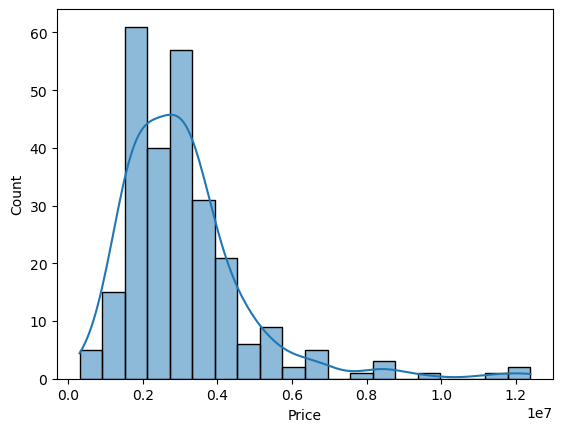

In [96]:
sns.histplot(x=df['Price'],kde=True, bins=20)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Net_m²', ylabel='Count'>

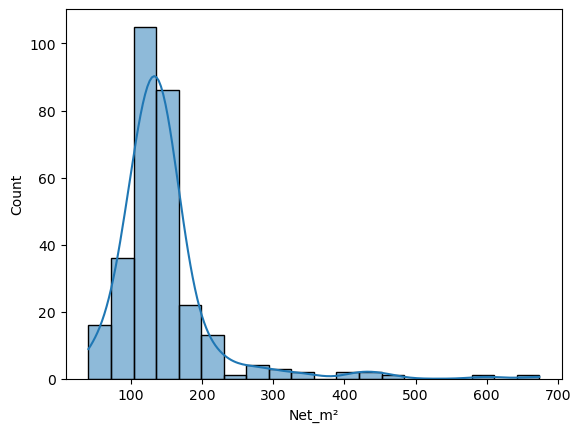

In [68]:
sns.histplot(x=df['Net_m²'],kde=True, bins=20)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Oda_Sayısı', ylabel='Count'>

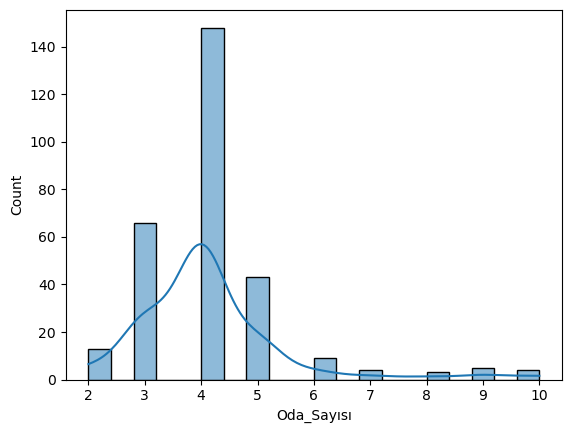

In [69]:
sns.histplot(x=df['Oda_Sayısı'],kde=True, bins=20)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Kira_Getirisi', ylabel='Count'>

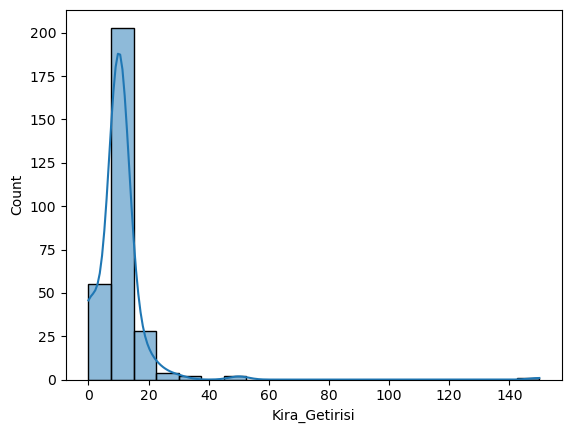

In [70]:
sns.histplot(x=df['Kira_Getirisi'],kde=True, bins=20)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bina_Yaşı', ylabel='Count'>

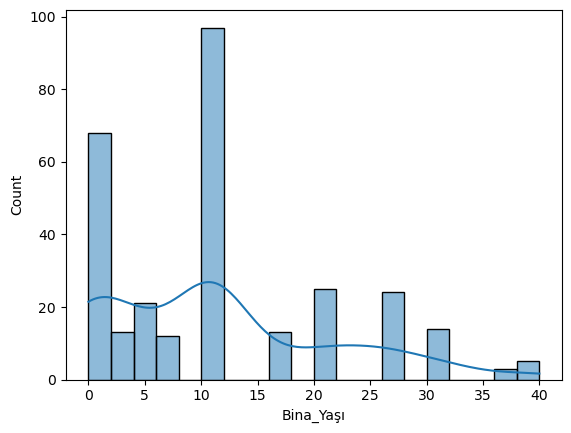

In [71]:
sns.histplot(x=df['Bina_Yaşı'],kde=True, bins=20)

## Outlier Tespiti ve Kaldırılması

<Axes: xlabel='Price'>

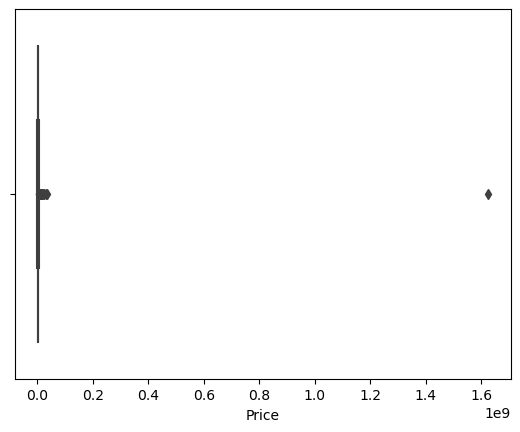

In [72]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Bina_Yaşı'>

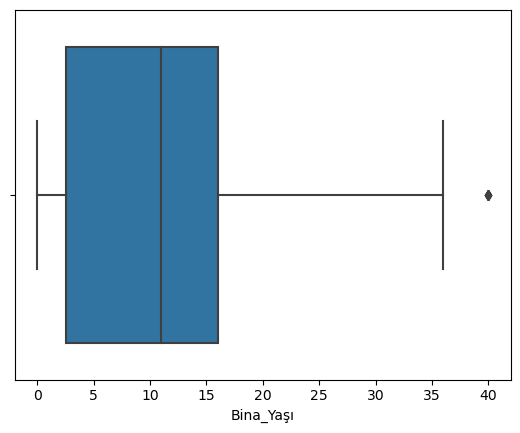

In [73]:
sns.boxplot(x=df['Bina_Yaşı'])

<Axes: xlabel='Net_m²'>

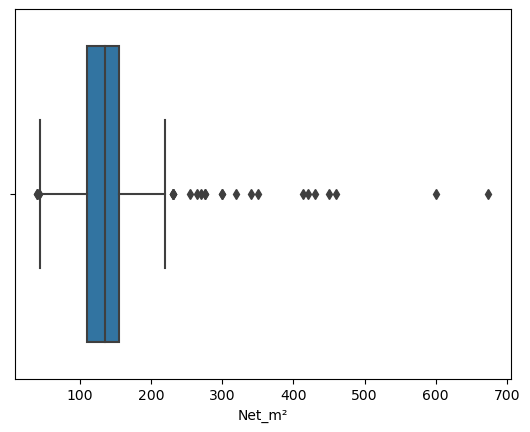

In [74]:
sns.boxplot(x=df['Net_m²'])

<Axes: xlabel='Brüt_m²'>

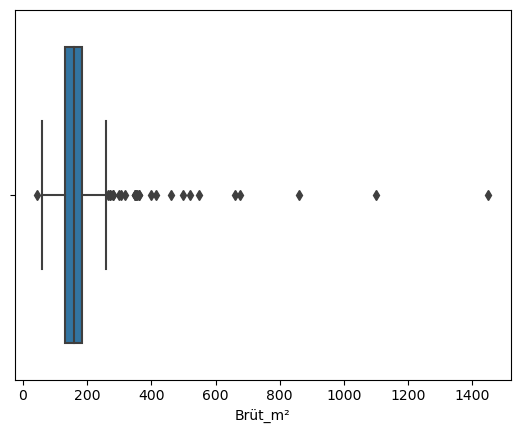

In [75]:
sns.boxplot(x=df['Brüt_m²'])

<Axes: xlabel='Oda_Sayısı'>

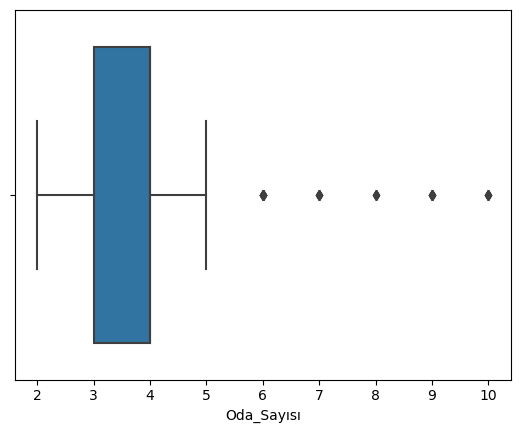

In [76]:
sns.boxplot(x=df['Oda_Sayısı'])

<Axes: xlabel='Banyo_Sayısı'>

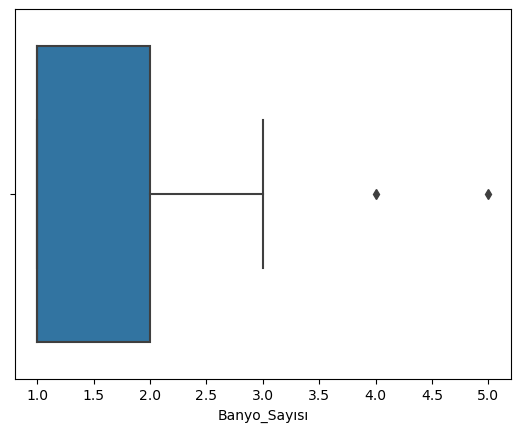

In [77]:
sns.boxplot(x=df['Banyo_Sayısı'])

<Axes: xlabel='Kira_Getirisi'>

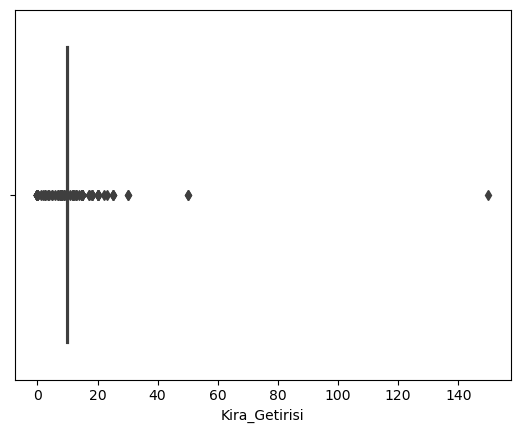

In [78]:
sns.boxplot(x=df['Kira_Getirisi'])

In [79]:
outliers=df.quantile(q=.97, numeric_only=True)

In [80]:
df=df[(df['Price']<outliers['Price'])]
df=df[(df['Net_m²']<outliers['Net_m²'])]
df=df[(df['Net_m²']<outliers['Brüt_m²'])]
df=df[(df['Oda_Sayısı']<outliers['Oda_Sayısı'])]
df=df[(df['Banyo_Sayısı']<outliers['Banyo_Sayısı'])]
df=df[(df['Kira_Getirisi']<outliers['Kira_Getirisi'])]

<Axes: xlabel='Price'>

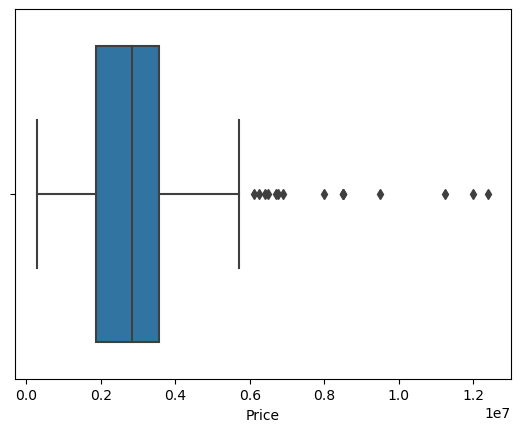

In [81]:
sns.boxplot(x=df['Price'])

In [82]:
df.columns

Index(['İlan_no', 'Net_m²', 'Brüt_m²', 'Oda_Sayısı', 'Banyo_Sayısı',
       'Binadaki_Kat_Sayısı', 'Isıtma_Tipi', 'Bulunduğu_Kat', 'Bina_Yaşı',
       'Kira_Getirisi', 'Location', 'Price', 'mahalle', 'ilçe', 'il'],
      dtype='object')

In [83]:
#Feature engineering
df['Banyo_Sayısı']=df['Banyo_Sayısı']**2
df['Oda_Sayısı']=df['Oda_Sayısı']**2

In [84]:
df.shape

(260, 15)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 294
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan_no              260 non-null    int64  
 1   Net_m²               260 non-null    float32
 2   Brüt_m²              260 non-null    float64
 3   Oda_Sayısı           260 non-null    float64
 4   Banyo_Sayısı         260 non-null    float64
 5   Binadaki_Kat_Sayısı  260 non-null    int32  
 6   Isıtma_Tipi          260 non-null    float64
 7   Bulunduğu_Kat        260 non-null    int32  
 8   Bina_Yaşı            260 non-null    int32  
 9   Kira_Getirisi        260 non-null    float64
 10  Location             260 non-null    object 
 11  Price                260 non-null    float64
 12  mahalle              260 non-null    int32  
 13  ilçe                 260 non-null    int32  
 14  il                   260 non-null    object 
dtypes: float32(1), float64(6), int32(5), int64(1)

In [86]:
x=df.drop(['Price','il','Location'],axis=1)
y=df[['Price']]

In [87]:
from sklearn.preprocessing import normalize, scale

In [88]:
yenix=scale(x)

In [89]:
from sklearn.model_selection import train_test_split 

In [90]:
x_train,x_test,y_train,y_test=train_test_split(yenix,y,test_size=.20,random_state=42) #train test sprit

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(yenix,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [92]:
algo_test(yenix,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.085801e-01,6.984679e+05,4.819857e+05
XGBRegressor,7.545805e-01,7.908741e+05,4.908497e+05
KNeighborsRegressor,7.418781e-01,8.110829e+05,6.298814e+05
Ridge,6.986332e-01,8.763964e+05,6.546524e+05
Lasso,6.986180e-01,8.764185e+05,6.545296e+05
Linear,6.986178e-01,8.764187e+05,6.545295e+05
ElasticNet,6.938162e-01,8.833727e+05,6.679718e+05
Extra Tree,4.397986e-01,1.194882e+06,6.593078e+05
AdaBoost,7.800536e-02,1.532911e+06,1.084544e+06
mlp_regressor,-9.956300e-03,1.604369e+06,1.122099e+06


In [93]:
normalizex=normalize(x) 

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(normalizex,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [95]:
algo_test(normalizex,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.199599e-01,6.773880e+05,4.722143e+05
XGBRegressor,7.545805e-01,7.908741e+05,4.908497e+05
Decision Tree,7.180025e-01,8.477651e+05,5.481154e+05
KNeighborsRegressor,7.113999e-01,8.576323e+05,6.372733e+05
Ridge,6.986332e-01,8.763964e+05,6.546524e+05
Lasso,6.986180e-01,8.764185e+05,6.545296e+05
Linear,6.986178e-01,8.764187e+05,6.545295e+05
ElasticNet,6.938162e-01,8.833727e+05,6.679718e+05
Extra Tree,4.792756e-01,1.152012e+06,6.157500e+05
AdaBoost,7.800536e-02,1.532911e+06,1.084544e+06
